<a href="https://colab.research.google.com/github/StevenWestmoreland/DS-Unit-1-Sprint-2-Statistics/blob/master/DSPT6_U1_S2_SamplingConfidenceIntervalsandHypothesisTesting_StevenWestmoreland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


# Confidence Interval

In [6]:
# import and read in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

! wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data --no-check-certificate

--2020-04-11 16:17:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-04-11 16:17:28 (286 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [5]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

voters = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')
voters

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [28]:
# tend to null values
print(voters.shape)
voters.isnull().sum()

(435, 17)


party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [29]:
voters.dropna(how='any', inplace=True)
print(voters.shape)
voters.isnull().sum().sum()

(232, 17)


0

In [30]:
# replace votes as numeric
voters = voters.replace({'y':1, 'n':0})
voters.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [31]:
# restrict to party lines
dem = voters[voters['party']=='democrat']
dem.shape

(124, 17)

In [32]:
rep = voters[voters['party']=='republican']
rep.shape

(108, 17)

In [33]:
# verifying
print(rep['budget'].mean())
voters.groupby('party')['budget'].mean()

0.1574074074074074


party
democrat      0.854839
republican    0.157407
Name: budget, dtype: float64

In [34]:
# average percentage of rep voting y on budget
rep['budget'].mean()

0.1574074074074074

In [36]:
# calculating a 95% conf int on either side
conf_int_rep_y = stats.t.interval(0.95, rep.shape[0], loc=rep['budget'].mean(), scale=stats.sem(rep['budget']))
conf_int_rep_y

(0.08762094648337333, 0.2271938683314415)

In [37]:
# average percentage of dem voting y on budget
dem['budget'].mean()

0.8548387096774194

In [39]:
conf_int_dem_y = stats.t.interval(0.95, dem.shape[0], loc=dem['budget'].mean(), scale=stats.sem(dem['budget']))
conf_int_dem_y

(0.7919717864340818, 0.9177056329207569)

In [0]:
def conf_interval(data, confidence=0.95):
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1)/np.sqrt(n)
    moe = stderr*stats.t.ppf((1 + confidence)/2.0, n-1)
    return (mean, mean-moe, mean+moe)

In [43]:
conf_interval(rep['budget'])

(0.1574074074074074, 0.08761355698812177, 0.22720125782669304)

In [44]:
conf_interval(dem['budget'])

(0.8548387096774194, 0.791966749899413, 0.9177106694554258)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(0.1574074074074074, 0.08761355698812177, 0.22720125782669304)


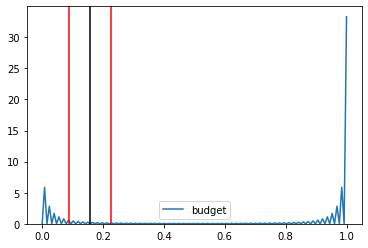

In [45]:
import seaborn as sns

sns.kdeplot(rep['budget'])
CI_Rep = conf_interval(rep['budget'])
plt.axvline(x=CI_Rep[1], color='red')
plt.axvline(x=CI_Rep[2], color='red')
plt.axvline(x=CI_Rep[0], color='black');
print (CI_Rep)

(0.8548387096774194, 0.791966749899413, 0.9177106694554258)


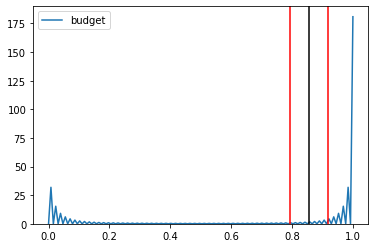

In [46]:
sns.kdeplot(dem['budget'])
CI_Dem = conf_interval(dem['budget'])
plt.axvline(x=CI_Dem[1], color='red')
plt.axvline(x=CI_Dem[2], color='red')
plt.axvline(x=CI_Dem[0], color='black');
print (CI_Dem)

## Analysis

So we have a 95% confidence that somewhere between 8.76% and 22.72% of republicans will vote yes on the budget issue. For the most part, this means that the Republican Party is not in favor for the budget proposal being brought forth. 

However, on the other side of the isle we've a 95% confidence in 79.20% to 91.77% of democrats voting yes, leading us to surmise that the Democratic Party is in favor of the budget proposal. 

# Chi-Squared Test

In [60]:
# read in data
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

workers = pd.read_csv(url, na_values=' ?')
workers.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
# tend to null values
workers.dropna(how='any', inplace=True)
print(workers.shape)
workers.isnull().sum().sum()

(30162, 15)


0

In [70]:
race_salary = pd.crosstab(workers['race'], workers['salary'])
race_salary

salary,<=50K,>50K
race,,
Amer-Indian-Eskimo,252,34
Asian-Pac-Islander,647,248
Black,2451,366
Other,210,21
White,19094,6839


### Chi-squared via Numpy

In [107]:
# find the expected values
row_sums = race_salary.iloc[0:5, 1].values + race_salary.iloc[0:5, 0].values
col_sums = race_salary.iloc[0, 0:2].values + race_salary.iloc[1, 0:2].values + race_salary.iloc[2, 0:2].values + race_salary.iloc[3, 0:2].values + race_salary.iloc[4, 0:2].values
print(row_sums)
print(col_sums)

[  286   895  2817   231 25933]
[22654  7508]


In [108]:
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/30162
    expected_row.append(expected_val)
  expected.append(expected_row)

expected

[[214.80816921954778, 71.19183078045222],
 [672.2143757045288, 222.7856242954711],
 [2115.7853590610703, 701.2146409389297],
 [173.49890590809628, 57.50109409190372],
 [19477.69319010676, 6455.306809893244]]

In [110]:
# compare to the observed values
race_salary.values


array([[  252,    34],
       [  647,   248],
       [ 2451,   366],
       [  210,    21],
       [19094,  6839]])

In [0]:
observed = race_salary.values

In [111]:
# run the equation
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

304.2413740892043

### Chi-squared via Scipy

In [68]:
stats.chisquare(race_salary, axis=None)

Power_divergenceResult(statistic=108450.63444068695, pvalue=0.0)

### Analysis

Because we ended up with a p-value of 0.0, we can with 99.9% certainty that we can reject the null hypothesis stating that the two are independent of each other; in other words, we can safely say that race has a 99.9% certainty of affecting the salary received or vice versa. 

## Chi-Squared Stretch Goal: alternative dataset

In [61]:
# read in new dataset
whisky_df = pd.read_csv('Whisky_Analysis.csv')
whisky_df.head()

,Whisky,Meta Critic,STDEV,#,Cost,Class,Super Cluster,Cluster,Country,Type
0,Ledaig 42yo Dusgadh,9.48,0.23,3,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
1,"Laphroaig 27yo 57.4% 1980-2007 (OB, 5 Oloroso ...",9.42,0.22,4,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
2,Glenfarclas 40yo,9.30,0.27,17,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
3,Aberlour A'Bunadh (Batch 56),9.25,0.24,3,$$$$,SingleMalt-like,ABC,A,Scotland,Malt
4,Glengoyne 25yo,9.24,0.22,21,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt


In [54]:
country_type = pd.crosstab (whisky_df['Country'], whisky_df['Type'])
country_type

Type,Barley,Blend,Bourbon,Flavoured,Grain,Malt,Rye,Wheat,Whiskey
Country,,,,,,,,,
Belgium,0,0,0,0,0,1,0,0,0
Canada,1,133,0,0,0,35,19,1,0
England,0,0,0,0,0,2,0,0,0
Finland,0,0,0,0,0,7,0,0,0
France,0,1,0,0,0,0,0,0,0
India,0,0,0,0,0,37,1,0,0
Ireland,0,43,0,0,3,35,0,0,0
Japan,0,20,0,0,1,54,0,0,0
Netherlands,0,0,0,0,0,3,1,0,0


### Chi-squared via Numpy

### Chi-squared via Scipy

In [67]:
 stats.chisquare(country_type, axis=None)

Power_divergenceResult(statistic=69637.1013986014, pvalue=0.0)

### Analysis
We've a p-value of 0.0, so we can, with 99.9% certainty, reject the null hypothesis. What this means is, we are that certain that the Country of Origin for a whisky has a direct influence of the Type it ends up being, or alternatively the Type dictates the Country of Origin (Chi-squared doesn't tell us the direction/causation).

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)